<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#LGBM-training" data-toc-modified-id="LGBM-training-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>LGBM training</a></span><ul class="toc-item"><li><span><a href="#utility" data-toc-modified-id="utility-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>utility</a></span></li><li><span><a href="#hit_type" data-toc-modified-id="hit_type-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>hit_type</a></span></li></ul></li></ul></div>

In [1]:
import sys
sys.path.append('..')

In [2]:
from taiko.profile import *
from taiko.database import *

import lightgbm as lgb
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import multiprocessing

Using TensorFlow backend.


In [3]:
pd.DataFrame(data={
    'drummer_name': get_all_drummers()
})

,drummer_name
0,aaaaa
1,carolyn
2,cuxi
3,fatfat
4,eve
5,oliver
6,chris
7,sheep
8,howeverover
9,celiven


In [4]:
create_all_drummer_profiles()

100%|██████████| 12/12 [00:00<00:00, 120.64it/s]


In [5]:
pfs = []
with multiprocessing.Pool() as p:
    drummers = get_all_drummers()
    for id_, pf in tqdm(enumerate(p.imap(get_profile, drummers)), total=len(drummers)):
        pf['who'] = id_
        pfs.append(pf)
        
pf = pd.concat(pfs, ignore_index=True)
# pf['hit_type'] = pf['hit_type'].transform(transform_hit_type)
pf

100%|██████████| 12/12 [00:00<00:00, 301.97it/s]


,L_A_AI,L_G_AI,L_AX_AI,L_AY_AI,L_AZ_AI,L_GX_AI,L_GY_AI,L_GZ_AI,L_A_MMI,L_G_MMI,...,R_GY_FR,R_GZ_FR,R_AXY_CORR,R_AYZ_CORR,R_AZX_CORR,R_GXY_CORR,R_GYZ_CORR,R_GZX_CORR,hit_type,who
0,1.0806,6.1168,0.2594,0.9863,0.3257,2.8363,-5.2350,0.8554,1.1058,5.3705,...,20.9961,15.9058,-0.6893,0.9130,-0.8665,0.8937,0.3618,0.7337,1,0
1,1.1551,6.6001,0.1999,0.9648,0.5925,3.1437,5.2923,0.6164,1.1724,6.4359,...,60.0159,13.2568,-0.5421,-0.3645,-0.4121,0.9831,0.9211,0.8842,1,0
2,1.2347,7.3739,-0.0564,1.1779,0.3334,4.6384,0.9268,0.3256,1.2568,7.5382,...,53.4668,49.2676,-0.9816,0.8613,-0.7726,0.9375,0.8315,0.9704,1,0
3,1.1115,10.1234,0.2182,1.0113,0.3178,4.6366,-6.9199,-4.6546,1.1084,9.7788,...,81.6193,118.2435,-0.7082,0.1154,0.1799,-0.0566,-0.7340,0.7189,1,0
4,1.1079,7.3399,-0.0050,0.8303,0.6463,5.3733,-2.5537,-1.4920,1.1496,7.5060,...,193.6889,293.2648,0.0586,0.8145,-0.4415,0.8869,-0.6183,-0.2538,1,0
5,1.2673,13.3737,-0.1774,1.0633,0.3595,10.4133,4.3020,0.0168,1.3935,13.4154,...,576.7029,158.5388,-0.2154,-0.4614,-0.3273,0.9609,0.4454,0.5399,1,0
6,1.4003,21.7071,-0.2142,1.3560,-0.1159,7.9160,-19.6067,1.6559,1.4191,21.0994,...,295.6726,126.7090,0.8006,0.8052,0.5336,0.9279,-0.7404,-0.5168,1,0
7,0.9456,16.3678,-0.1304,0.7655,-0.1061,10.8841,7.8717,-0.3858,0.9031,16.0134,...,185.1349,196.6644,0.8130,0.2957,-0.2793,0.7781,-0.0919,0.4755,1,0
8,1.6695,15.5976,-0.3728,1.4952,-0.4719,4.0183,-11.4969,7.9272,1.7926,16.1589,...,236.0596,191.2171,0.1485,0.5935,-0.4742,0.7172,-0.3371,0.3766,1,0
9,0.7486,8.0039,0.1095,0.5172,-0.0830,-0.9567,5.1696,1.3317,0.8296,8.4414,...,420.8832,327.1698,0.2011,0.4254,-0.3972,0.8978,-0.3868,-0.0276,1,0


# LGBM training

## utility

In [6]:
def my_f1_score(y_pred, y):
    y = y.get_label()
    y_pred = y_pred.reshape(len(np.unique(y)), -1).argmax(axis=0)
    return "f1-score", metrics.f1_score(y, y_pred, average="macro"), True

In [7]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [8]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3, 4, 5], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

## hit_type

In [9]:
train_df = pf.drop('who', axis=1).copy()

x = train_df.drop(['hit_type'], axis=1)
y = train_df['hit_type']

# train / valid / test = 0.4 / 0.4 / 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2, stratify=y)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, random_state=0, test_size=0.5, stratify=y_train)

y_train

3203    4
6521    1
4856    5
5526    5
2153    7
5670    1
1304    3
352     4
3558    1
3036    2
3097    3
2786    0
620     2
1247    2
131     6
4379    2
4821    5
3514    1
4310    2
577     1
6760    4
2620    5
5612    0
3266    5
6772    4
2604    5
5275    2
6957    6
5815    2
1869    4
       ..
2689    6
3909    6
6673    3
4521    3
6219    6
2144    7
1079    7
2637    5
5472    5
3352    6
2830    7
3176    4
1549    1
374     5
5998    4
3676    3
3929    6
1978    6
4836    5
4358    2
6533    1
268     2
5489    5
6335    0
380     5
540     1
2002    6
6862    5
5633    1
5664    1
Name: hit_type, Length: 2864, dtype: int64

In [10]:
train_set = lgb.Dataset(x_train, y_train)
valid_set = lgb.Dataset(x_valid, y_valid, free_raw_data=False)
watchlist = [valid_set]

params = dict({
    'learning_rate': 0.2,
    'application': 'multiclass',
    'num_classes': 8,
#     'min_data_in_leaf': 3,
    'max_depth': 3,
    'num_leaves': 2 ** 3,
    'verbosity': 0
#     'metric': 'multi_logloss'
})

grid_params = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [8, 10],
}

model = lgb.train(params, train_set=train_set, valid_sets=watchlist,
                  num_boost_round=500, verbose_eval=5, early_stopping_rounds=100, feval=my_f1_score)
y_pred = model.predict(x_test, num_iteration=model.best_iteration)

Training until validation scores don't improve for 100 rounds.
[5]	valid_0's f1-score: 0.723213
[10]	valid_0's f1-score: 0.746004
[15]	valid_0's f1-score: 0.769089
[20]	valid_0's f1-score: 0.787292
[25]	valid_0's f1-score: 0.811702
[30]	valid_0's f1-score: 0.821679
[35]	valid_0's f1-score: 0.831029
[40]	valid_0's f1-score: 0.835988
[45]	valid_0's f1-score: 0.84112
[50]	valid_0's f1-score: 0.847321
[55]	valid_0's f1-score: 0.849436
[60]	valid_0's f1-score: 0.853728
[65]	valid_0's f1-score: 0.855841
[70]	valid_0's f1-score: 0.858457
[75]	valid_0's f1-score: 0.863665
[80]	valid_0's f1-score: 0.864732
[85]	valid_0's f1-score: 0.866696
[90]	valid_0's f1-score: 0.870484
[95]	valid_0's f1-score: 0.870456
[100]	valid_0's f1-score: 0.874118
[105]	valid_0's f1-score: 0.876052
[110]	valid_0's f1-score: 0.875091
[115]	valid_0's f1-score: 0.878428
[120]	valid_0's f1-score: 0.878587
[125]	valid_0's f1-score: 0.880223
[130]	valid_0's f1-score: 0.881333
[135]	valid_0's f1-score: 0.882003
[140]	valid_0

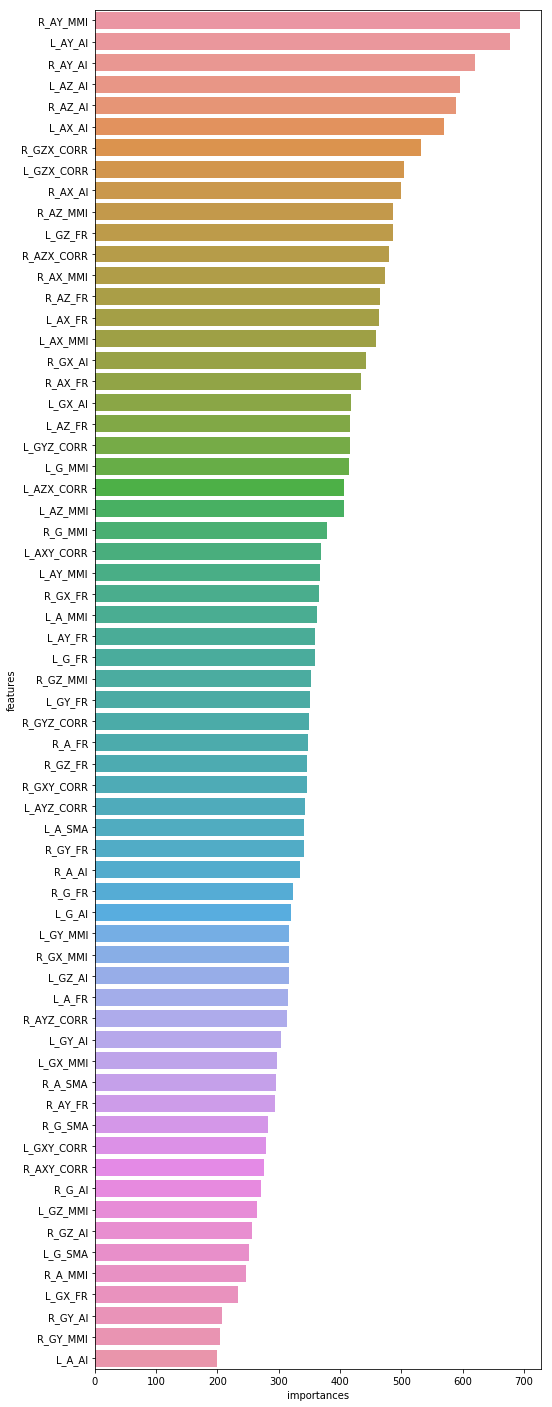

In [11]:
plot_df = pd.DataFrame({'features': train_df.columns[train_df.columns != 'hit_type'],
                        'importances': model.feature_importance()})
plot_df = plot_df.sort_values('importances', ascending=False)

plt.figure(figsize=(8, 25))
sns.barplot(x = plot_df.importances, y = plot_df.features)
plt.show()

In [12]:
y_preds = []
for y_pred_ in [y_pred]:
    predictions = []
    for x in y_pred_:
        predictions.append(np.argmax(x))
    y_preds.append(pd.Series(data=predictions))

Normalized confusion matrix
[[0.8974359  0.00854701 0.00854701 0.00854701 0.00854701 0.05128205
  0.01709402 0.        ]
 [0.0052356  0.85863874 0.0052356  0.10471204 0.         0.0104712
  0.01570681 0.        ]
 [0.01052632 0.00526316 0.91578947 0.00526316 0.03684211 0.02105263
  0.00526316 0.        ]
 [0.         0.0625     0.         0.90625    0.00520833 0.00520833
  0.015625   0.00520833]
 [0.02094241 0.         0.04712042 0.         0.89528796 0.02094241
  0.01570681 0.        ]
 [0.02072539 0.         0.         0.         0.01036269 0.84455959
  0.10362694 0.02072539]
 [0.         0.         0.         0.         0.         0.07253886
  0.91709845 0.01036269]
 [0.0060241  0.         0.01204819 0.         0.         0.07831325
  0.03012048 0.87349398]]


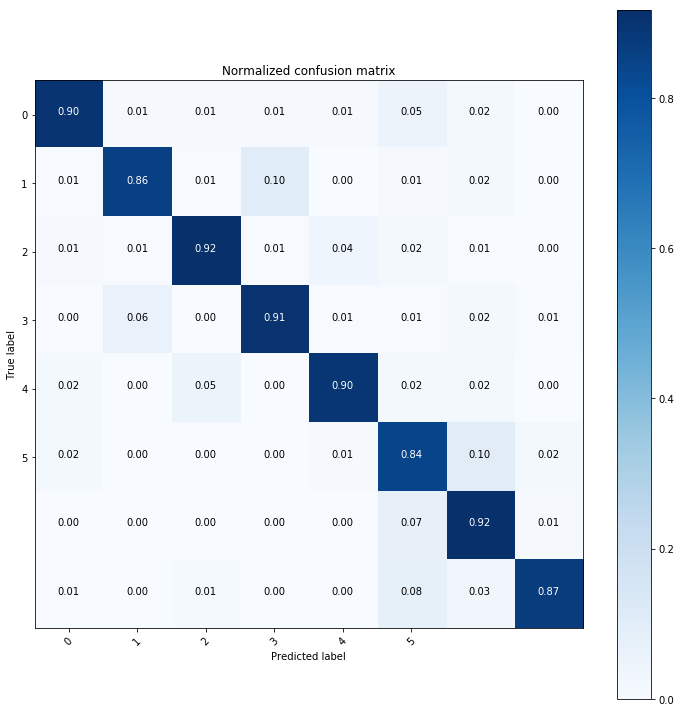

             precision    recall  f1-score   support

          0       0.90      0.90      0.90       117
          1       0.92      0.86      0.89       191
          2       0.93      0.92      0.92       190
          3       0.89      0.91      0.90       192
          4       0.94      0.90      0.92       191
          5       0.79      0.84      0.82       193
          6       0.83      0.92      0.87       193
          7       0.95      0.87      0.91       166

avg / total       0.89      0.89      0.89      1433

0.8899909452048713


In [13]:
y_tests = [y_test]
for y_pre, y_tst in zip(y_preds, y_tests):
    cutstom_output_cnf_matrix(y_tst, y_pre)
    print(metrics.classification_report(y_tst, y_pre))
    
    print(metrics.f1_score(y_tst, y_pre, average = 'macro'))

In [14]:
model.save_model('lgbm_model.h5')